In [2]:
import os, shutil

In [3]:
base_dir = '/Users/liuxuanchi/Downloads/cats_and_dogs_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [7]:
original_dataset_dir = '/Users/liuxuanchi/Downloads/dogs-vs-cats/train'

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [8]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
500
500
1000
500
500


In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0001),
             metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [15]:
from PIL import Image

In [16]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 119s 1s/step - loss: 0.6887 - acc: 0.5475 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 121s 1s/step - loss: 0.6564 - acc: 0.6125 - val_loss: 0.6369 - val_acc: 0.6530
Epoch 3/30
100/100 [==============================] - 123s 1s/step - loss: 0.5975 - acc: 0.6790 - val_loss: 0.6587 - val_acc: 0.6100
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 0.5521 - acc: 0.7250 - val_loss: 0.6304 - val_acc: 0.6490
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5239 - acc: 0.7405 - val_loss: 0.5810 - val_acc: 0.7000
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.4922 - acc: 0.7555 - val_loss: 0.5670 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4691 - acc: 0.7760 - val_loss: 0.5861 - val_acc: 0.6940
Epoch 8/30
100/100 [=

In [17]:
model.save('cvd_small1.h5')

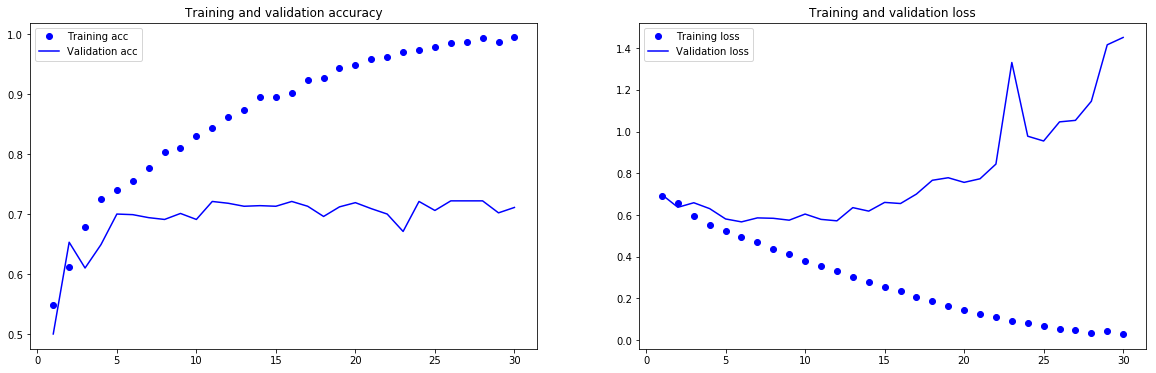

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

# plt.figure()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 数据增强解决过拟合问题

In [21]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

# 验证数据不能增强
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=80,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/80
100/100 [==============================] - 174s 2s/step - loss: 0.6916 - acc: 0.5206 - val_loss: 0.6844 - val_acc: 0.5482
Epoch 2/80
100/100 [==============================] - 170s 2s/step - loss: 0.6835 - acc: 0.5641 - val_loss: 0.6625 - val_acc: 0.6179
Epoch 3/80
100/100 [==============================] - 171s 2s/step - loss: 0.6609 - acc: 0.6056 - val_loss: 0.6857 - val_acc: 0.5603
Epoch 4/80
100/100 [==============================] - 170s 2s/step - loss: 0.6527 - acc: 0.6209 - val_loss: 0.6531 - val_acc: 0.5857
Epoch 5/80
100/100 [==============================] - 171s 2s/step - loss: 0.6289 - acc: 0.6481 - val_loss: 0.6029 - val_acc: 0.6567
Epoch 6/80
100/100 [==============================] - 170s 2s/step - loss: 0.6216 - acc: 0.6544 - val_loss: 0.5959 - val_acc: 0.6798
Epoch 7/80
100/100 [==============================] - 171s 2s/step - loss: 0.6138 - acc: 0.6606 - val_loss: 0.5815 - val_acc: 0.6758
Epoch 8/80
100/100 [==============================] - 224s 2s/step - 

In [24]:
model.save('cvd_small2.h5')

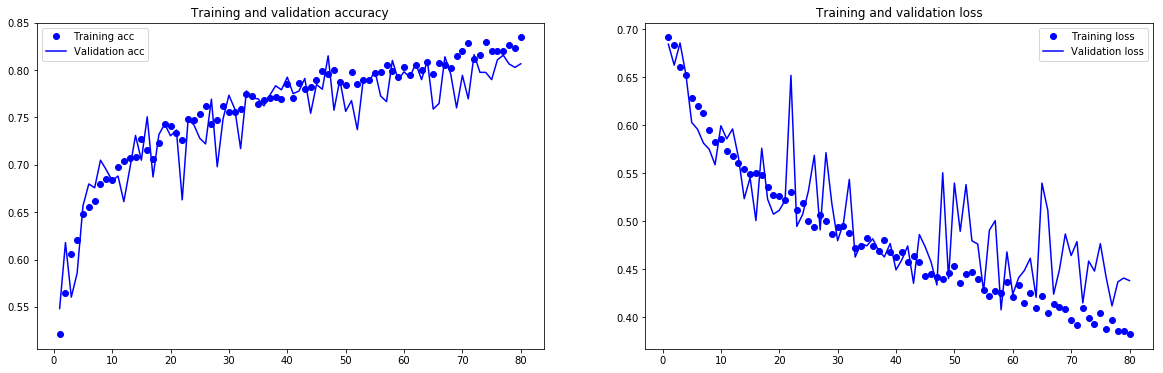

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

# plt.figure()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

conv_base.summary()

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 16s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
____

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20;

def extract_feature(directory, samples):
    features = np.zeros(shape=(samples, 4, 4, 512))
    labels = np.zeros(shape=(samples))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150, 150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if(i * batch_size >= samples):
            break
    
    return features, labels 

In [11]:
train_features, train_labels = extract_feature(train_dir, 2000)
valid_features, valid_labels = extract_feature(validation_dir, 1000)
test_features, test_labels = extract_feature(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
train_features = np.reshape(train_features, (2000, 4*4*512))
valid_features = np.reshape(valid_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [13]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.00002),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(valid_features, valid_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6275 - acc: 0.6405 - val_loss: 0.4515 - val_acc: 0.8500
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4326 - acc: 0.8035 - val_loss: 0.3670 - val_acc: 0.8720
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3603 - acc: 0.8505 - val_loss: 0.3398 - val_acc: 0.8710
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3215 - acc: 0.8660 - val_loss: 0.2989 - val_acc: 0.8900
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2903 - acc: 0.8800 - val_loss: 0.2868 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2721 - acc: 0.8960 - val_loss: 0.2740 - v

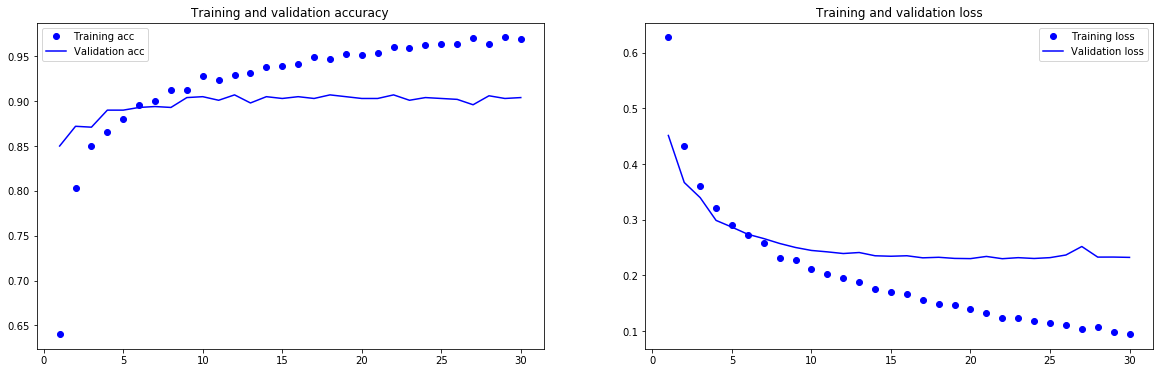

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()